<a href="https://colab.research.google.com/github/WHU-Peter/COMP6248-Deep-Learning/blob/master/DL_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# We're going to use a library called celluloid to make animations that work on colab
try: 
    from celluloid import Camera
except:
    !pip install celluloid

from celluloid import Camera
from IPython.display import HTML
import torch
import torch.optim as optim
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import pandas as pd
from torch.utils import data

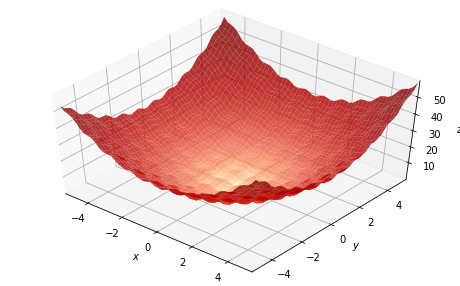

In [3]:
def function(x):
  return torch.tensor(2) + x[0]**2 + x[1]**2 - torch.cos(2*math.pi*x[0]) - torch.cos(2*math.pi*x[1])

xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).detach().numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.OrRd)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

(-5.12, 5.12)

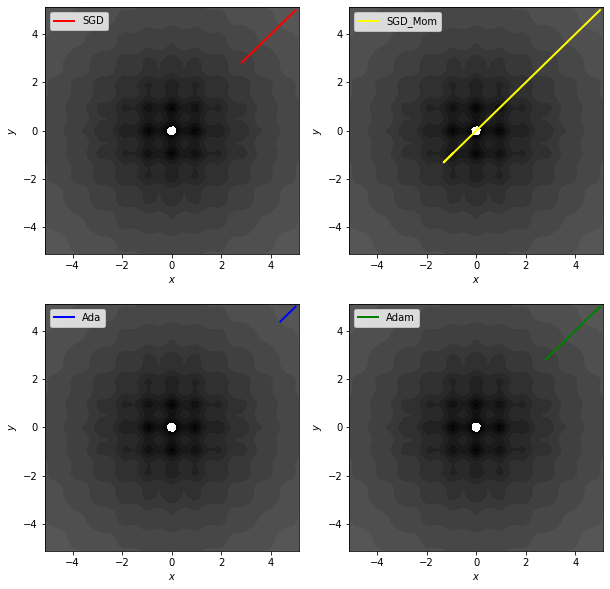

In [5]:
def optimal(p, opt):
  epochs = 1000
  path = np.empty((2,0))
  path = np.append(path, p.data.numpy(), axis=1)
  for i in range(epochs):
    opt.zero_grad()
    output = function(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)
  return path

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
path_sgd = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
path_sgd_mom = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
path_ada = optimal(p, opt)

p = torch.tensor([[5.], [5.]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
path_adam = optimal(p, opt)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[0,0].plot(path_sgd[0], path_sgd[1], color='red', label='SGD', linewidth=2)
ax[0,0].legend()
ax[0,0].set_xlabel('$x$')
ax[0,0].set_ylabel('$y$')
ax[0,0].set_xlim((xmin, xmax))
ax[0,0].set_ylim((ymin, ymax))
ax[0,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[0,1].plot(path_sgd_mom[0], path_sgd_mom[1], color='yellow', label='SGD_Mom', linewidth=2)
ax[0,1].legend()
ax[0,1].set_xlabel('$x$')
ax[0,1].set_ylabel('$y$')
ax[0,1].set_xlim((xmin, xmax))
ax[0,1].set_ylim((ymin, ymax))
ax[1,0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[1,0].plot(path_ada[0], path_ada[1], color='blue', label='Ada', linewidth=2)
ax[1,0].legend()
ax[1,0].set_xlabel('$x$')
ax[1,0].set_ylabel('$y$')
ax[1,0].set_xlim((xmin, xmax))
ax[1,0].set_ylim((ymin, ymax))
ax[1,1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax[1,1].plot(path_adam[0], path_adam[1], color='green', label='Adam', linewidth=2)
ax[1,1].legend()
ax[1,1].set_xlabel('$x$')
ax[1,1].set_ylabel('$y$')
ax[1,1].set_xlim((xmin, xmax))
ax[1,1].set_ylim((ymin, ymax))

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0) #shuffle
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter
# add label indices column
mapping = {k: v for v, k in enumerate(df [4]. unique())} 
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {−1,1}

# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)
# create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long) 
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long) 
data_tr = alldata [:75]
data_va = alldata [75:]

dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25) # create your dataloader

In [7]:
def hinge_loss(y_pred, y_true):
    return torch.mean(torch.clamp(1 - y_pred.mul(y_true), min=0))

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

[[0.86930089 0.56502101 0.78698053 0.12768966]] [0.76870195]


Text(0.5, 1.0, 'Adam')

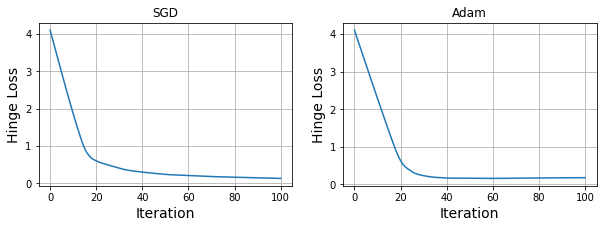

In [73]:
def grad(opt, w, b):
  epochs = 100
  Loss = np.zeros(epochs + 1)
  for epoch in range(epochs):
      Loss[epoch] = hinge_loss(svm(data_va, w, b), targets_va)
      for batch in dataloader:
        opt.zero_grad()
        output = hinge_loss(svm(batch[0], w, b), batch[1])
        output.backward()
        opt.step()
  Loss[epochs] = hinge_loss(svm(data_va, w, b), targets_va)
  return Loss

w = np.random.rand(1, 4)
b = np.random.rand(1)
print(w, b)
w1 = torch.tensor(w, requires_grad=True)
b1 = torch.tensor(b, requires_grad=True)
opt1 = optim.SGD([w1,b1], lr=0.01, weight_decay=0.0001)
Loss1 = grad(opt1, w1, b1)

w2 = torch.tensor(w, requires_grad=True)
b2 = torch.tensor(b, requires_grad=True)
opt2 = optim.Adam([w2,b2], lr=0.01, weight_decay=0.0001)
Loss2 = grad(opt2, w2, b2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax[0].plot(Loss1)
ax[0].grid()
ax[0].set_xlabel("Iteration", fontsize=14)
ax[0].set_ylabel("Hinge Loss", fontsize=14)
ax[0].set_title("SGD",fontsize=12)
ax[1].plot(Loss2)
ax[1].grid()
ax[1].set_xlabel("Iteration", fontsize=14)
ax[1].set_ylabel("Hinge Loss", fontsize=14)
ax[1].set_title("Adam",fontsize=12)

[[0.38702747 0.93208334 0.10005244 0.44858995]] [0.46961499]
[[0.62577309 0.52978496 0.14074603 0.89274375]] [0.73266109]
[[0.55729626 0.19254667 0.20875486 0.35751727]] [0.86019849]
[[0.2503268  0.87213442 0.31589551 0.49178876]] [0.71589266]
[[0.8751662  0.31846801 0.29631588 0.87158301]] [0.63780913]
[[0.52042449 0.2344769  0.33262895 0.88730452]] [0.61604933]
[[0.2400448  0.23609578 0.45507459 0.74666339]] [0.05554747]
[[0.37105391 0.74875823 0.62012243 0.05237389]] [0.4708177]
[[0.34881181 0.94028644 0.39970482 0.79072486]] [0.73116677]
[[0.3926615  0.34055694 0.77293579 0.31101545]] [0.8550294]
[[0.20729387 0.26028861 0.75960048 0.79872813]] [0.49405853]
[[0.13972805 0.75491009 0.28514531 0.4521296 ]] [0.37555078]
[[0.0024906  0.58722135 0.41407539 0.83092553]] [0.9516123]
[[0.82584731 0.05006727 0.84778804 0.05613235]] [0.49077959]
[[0.71184614 0.65957108 0.30527012 0.85484622]] [0.42479539]
[[0.37558245 0.92504826 0.89650049 0.54775007]] [0.32236306]
[[0.28954364 0.19074301 0.3

Text(0.5, 1.0, 'Adam')

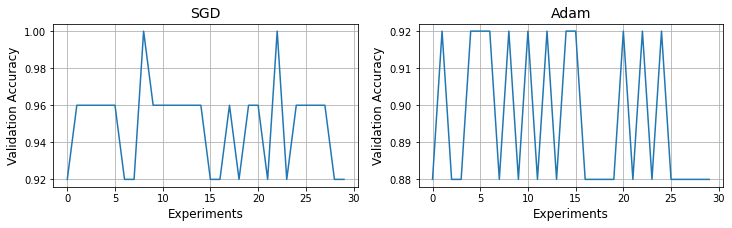

In [77]:
Acc1 = np.empty(1)
Acc2 = np.empty(1)

for i in range(30):
  w = np.random.rand(1, 4)
  b = np.random.rand(1)
  print(w, b)
  w1 = torch.tensor(w, requires_grad=True)
  b1 = torch.tensor(b, requires_grad=True)
  opt1 = optim.SGD([w1,b1], lr=0.01, weight_decay=0.0001)
  grad(opt1, w1, b1)
  y_pred = svm(data_va, w1, b1)
  y_pred[np.where(y_pred <= 0.)] = -1
  y_pred[np.where(y_pred > 0.)] = 1
  error = np.nonzero(y_pred - targets_va)
  Acc1 = np.append(Acc1, 1-(np.array(error).shape[0] / targets_va.shape[0]))
  
  w2 = torch.tensor(w, requires_grad=True)
  b2 = torch.tensor(b, requires_grad=True)
  opt2 = optim.Adam([w2,b2], lr=0.01, weight_decay=0.0001)
  Loss2 = grad(opt2, w2, b2)
  y_pred = svm(data_va, w2, b2)
  y_pred[np.where(y_pred <= 0.)] = -1
  y_pred[np.where(y_pred > 0.)] = 1
  error = np.nonzero(y_pred - targets_va)
  Acc2 = np.append(Acc2, 1-(np.array(error).shape[0] / targets_va.shape[0]))

Acc1 = Acc1[1:]
Acc2 = Acc2[1:]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].plot(Acc1)
ax[0].grid()
ax[0].set_xlabel("Experiments", fontsize=12)
ax[0].set_ylabel("Validation Accuracy", fontsize=12)
ax[0].set_title("SGD",fontsize=14)
ax[1].plot(Acc2)
ax[1].grid()
ax[1].set_xlabel("Experiments", fontsize=12)
ax[1].set_ylabel("Validation Accuracy", fontsize=12)
ax[1].set_title("Adam",fontsize=14)